## Question 1: Which of the marketing criteria were most popular among companies every year and has this changed over time?

For this question we will visualise our data and build a regression model to validate the significance of changes that may become apparent from the prior visualisation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("DataSets/superbowl-ads(sorted).csv")

In [3]:
df[['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']] = df[['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']].astype(int)

In [4]:
# Group by year and sum for every marketing attribute, then divide by #commercials
by = df[['year','funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']].groupby(df['year'])
funny = []
product = []
patriot = []
celebrity = [] 
danger = []
animals = []
sex = []
for key, item in by:
    funny.append(by['funny'].get_group(key).sum()/by.size()[key])
    product.append(by['show_product_quickly'].get_group(key).sum()/by.size()[key])
    patriot.append(by['patriotic'].get_group(key).sum()/by.size()[key])
    celebrity.append(by['celebrity'].get_group(key).sum()/by.size()[key])
    danger.append(by['danger'].get_group(key).sum()/by.size()[key])
    animals.append(by['animals'].get_group(key).sum()/by.size()[key])
    sex.append(by['use_sex'].get_group(key).sum()/by.size()[key])

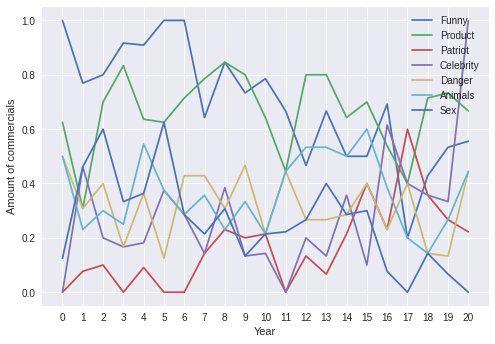

In [5]:
# Very cluttered view of the fluctuations in overall citeria use.
year = np.arange(21)
plt.plot(year, funny, label = 'Funny')
plt.plot(year, product, label = 'Product')
plt.plot(year, patriot, label = 'Patriot')
plt.plot(year, celebrity, label = 'Celebrity')
plt.plot(year, danger, label = 'Danger')
plt.plot(year, animals, label = 'Animals')
plt.plot(year, sex, label = 'Sex')
plt.ylabel('Amount of commercials')
plt.xticks(year)
plt.xlabel('Year')
plt.legend()
plt.show()

In [6]:
# Statsmodels and Scikit were acting weird so here is my version of simple linear regression.
def GD(t0, t1, X, y, alpha):
    n = len(X)
    k0 = 0
    k1 = 0
    for i in range(n):
        k0 += (t0 + t1 * X[i] - y[i])
        k1 += X[i]*(t0 + t1 * X[i] - y[i])
    t0 = t0 - alpha * (2/n) * k0
    t1 = t1 - alpha * (2/n) * k1
    
    return (t0, t1)

def LG(X, y, t0=1, t1=1, alpha=0.0001):
    n = len(y)

    for i in range(10000):
        k = 0
        t0, t1 = GD(t0, t1, X, y, alpha)

        for i in range(n):
            k += (t0 + t1 * X[i] - y[i])**2

        J = 1/n * k

    return t0, t1

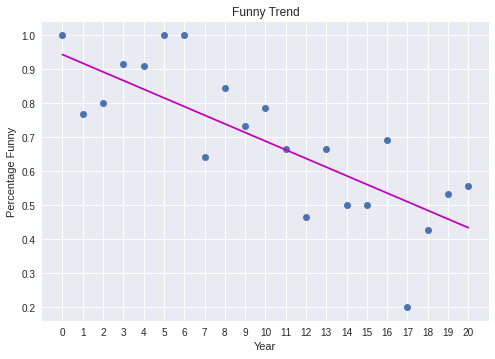

In [7]:
# Show individual trend of criteria used over time.

f0, f1 = LG(year, funny, t0=1, t1=1, alpha=0.0001)
plt.plot(year, funny, 'o')
plt.plot(year, (f0 + f1* year), 'm')
plt.title('Funny Trend')
plt.xlabel('Year')
plt.ylabel('Percentage Funny')
plt.xticks(year)
plt.show()

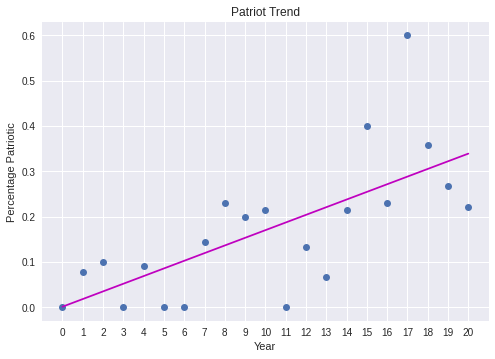

In [8]:
p0, p1 = LG(year, patriot, alpha=0.001)
plt.plot(year, patriot, 'o')
plt.plot(year, (p0 + p1* year), 'm')
plt.title('Patriot Trend')
plt.xlabel('Year')
plt.ylabel('Percentage Patriotic')
plt.xticks(year)
plt.show()

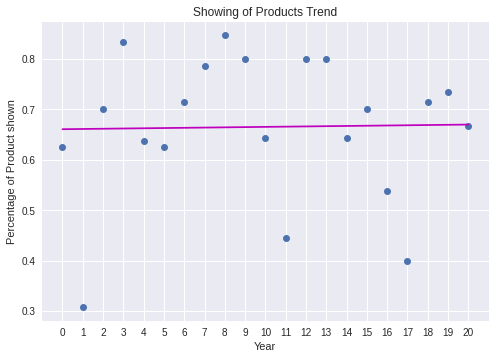

In [9]:
pr0, pr1 = LG(year, product, alpha=0.001)
plt.plot(year, product, 'o')
plt.plot(year, (pr0 + pr1* year), 'm')
plt.title('Showing of Products Trend')
plt.xlabel('Year')
plt.ylabel('Percentage of Product shown')
plt.xticks(year)
plt.show()

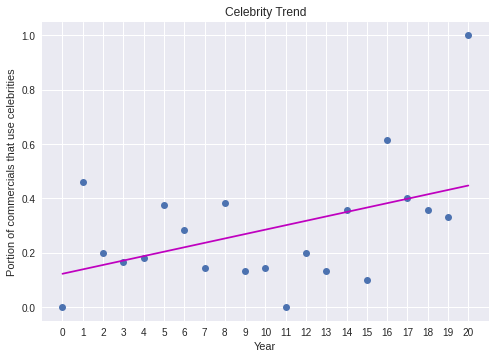

In [10]:
c0, c1 = LG(year, celebrity, alpha=0.001)
plt.plot(year, celebrity, 'o')
plt.plot(year, (c0 + c1* year), 'm')
plt.title('Celebrity Trend')
plt.xlabel('Year')
plt.ylabel('Portion of commercials that use celebrities')
plt.xticks(year)
plt.show()

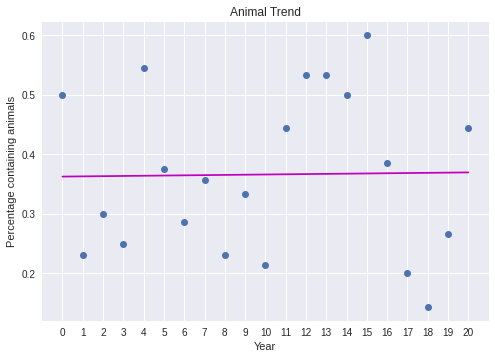

In [11]:
a0, a1 = LG(year, animals, alpha=0.001)
plt.plot(year, animals, 'o')
plt.plot(year, (a0 + a1* year), 'm')
plt.title('Animal Trend')
plt.xlabel('Year')
plt.ylabel('Percentage containing animals')
plt.xticks(year)
plt.show()

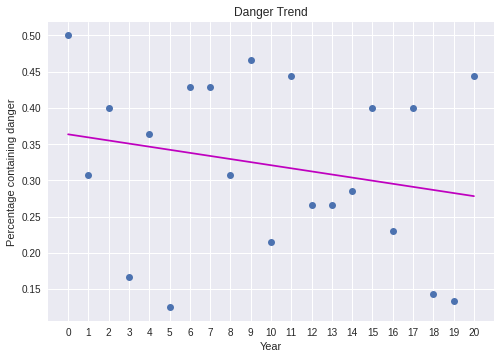

In [12]:
d0, d1 = LG(year, danger, alpha=0.001)
plt.plot(year, danger, 'o')
plt.plot(year, (d0 + d1* year), 'm')
plt.title('Danger Trend')
plt.xlabel('Year')
plt.ylabel('Percentage containing danger')
plt.xticks(year)
plt.show()

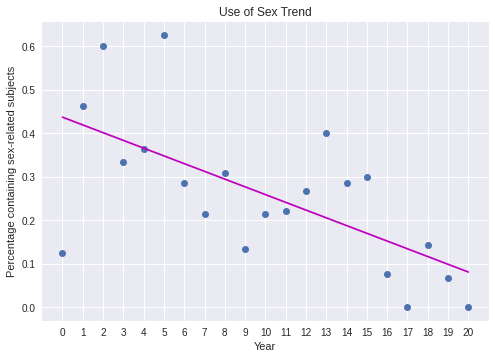

In [13]:
s0, s1 = LG(year, sex, alpha=0.001)
plt.plot(year, sex, 'o')
plt.plot(year, (s0 + s1* year), 'm')
plt.title('Use of Sex Trend')
plt.xlabel('Year')
plt.ylabel('Percentage containing sex-related subjects')
plt.xticks(year)
plt.show()

## Conclusion Q1
As we can see from the above trends, funny commercials and ones with elements of danger or sex are declining in popularity among the companies. And commercials with celebrities and patriotic elements have found a rise in popularity. It also remains highly likely that a company will show their products quickly in the commercials.

## Question 2: Can we infer a preference for the criteria which companies like to show most often in their advertisements?

Or otherwise put: do companies change their preferences for criteria over time or is there a method to the madness.

In [14]:
# Group by company and year
bc = df.drop(['superbowl_ads_dot_com_url','youtube_url'],axis=1)
bc.head()

,year,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,2000,E-Trade,1,1,0,0,0,1,0
1,2000,E-Trade,1,1,0,0,1,0,0
2,2000,Budweiser,1,1,0,0,0,0,0
3,2000,Bud Light,1,1,0,0,1,0,0
4,2000,Budweiser,1,0,0,0,0,1,0


In [15]:
# Every group is implicitely ordered by year, so we only need to group by company
groupbc = bc.groupby(['brand'])
print(groupbc.size())

brand
Bud Light    60
Budweiser    43
Coca-Cola    21
Doritos      25
E-Trade      13
Hynudai      22
Kia          13
NFL          11
Pepsi        25
Toyota       11
dtype: int64


In [16]:
# Bud Light    0
# Budweiser    1
# Coca-Cola    2
# Doritos      3
# E-Trade      4
# Hynudai      5
# Kia          6
# NFL          7
# Pepsi        8
# Toyota       9

def buildCriteriaOverTime(criteria):
    bcy = df.groupby(['brand','year'])[criteria]
    names = ['Bud Light', 'Budweiser', 'Coca-Cola','Doritos','E-Trade','Hyundai','Kia','NFL','Pepsi','Toyota']
    fun = [[],[],[],[],[],[],[],[],[],[]]
    first = True
    prevcomp = ''
    index0 = 0
    index1 = 0 
    for key, item in bcy:
        #print(key[0], item.sum())
        if first == True:
            prevcomp = key[0]
            first = False

        if key[0] == prevcomp:
            fun[index0].append(item.sum())

        if key[0] != prevcomp:
            prevcomp = key[0]
            index0 += 1

    fundf = pd.DataFrame(fun)
    fundf['Brand'] = names
    fundf = fundf.set_index('Brand')
    return fundf

In [17]:
# Generate DataFrames for 'year','funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex'
fundf = buildCriteriaOverTime('funny')
prodf = buildCriteriaOverTime('show_product_quickly')
patdf = buildCriteriaOverTime('patriotic')
celdf = buildCriteriaOverTime('celebrity')
dandf = buildCriteriaOverTime('danger')
anidf = buildCriteriaOverTime('animals')
sexdf = buildCriteriaOverTime('use_sex')

In [18]:
BLdf = pd.DataFrame([fundf.iloc[0],prodf.iloc[0],patdf.iloc[0],celdf.iloc[0],dandf.iloc[0],anidf.iloc[0],sexdf.iloc[0]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
BWdf = pd.DataFrame([fundf.iloc[1],prodf.iloc[1],patdf.iloc[1],celdf.iloc[1],dandf.iloc[1],anidf.iloc[1],sexdf.iloc[1]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
CCdf = pd.DataFrame([fundf.iloc[2],prodf.iloc[2],patdf.iloc[2],celdf.iloc[2],dandf.iloc[2],anidf.iloc[2],sexdf.iloc[2]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
Dodf = pd.DataFrame([fundf.iloc[3],prodf.iloc[3],patdf.iloc[3],celdf.iloc[3],dandf.iloc[3],anidf.iloc[3],sexdf.iloc[3]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
ETdf = pd.DataFrame([fundf.iloc[4],prodf.iloc[4],patdf.iloc[4],celdf.iloc[4],dandf.iloc[4],anidf.iloc[4],sexdf.iloc[4]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
HDdf = pd.DataFrame([fundf.iloc[5],prodf.iloc[5],patdf.iloc[5],celdf.iloc[5],dandf.iloc[5],anidf.iloc[5],sexdf.iloc[5]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
Kidf = pd.DataFrame([fundf.iloc[6],prodf.iloc[6],patdf.iloc[6],celdf.iloc[6],dandf.iloc[6],anidf.iloc[6],sexdf.iloc[6]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
NFdf = pd.DataFrame([fundf.iloc[7],prodf.iloc[7],patdf.iloc[7],celdf.iloc[7],dandf.iloc[7],anidf.iloc[7],sexdf.iloc[7]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
Pedf = pd.DataFrame([fundf.iloc[8],prodf.iloc[8],patdf.iloc[8],celdf.iloc[8],dandf.iloc[8],anidf.iloc[8],sexdf.iloc[8]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)
TYdf = pd.DataFrame([fundf.iloc[9],prodf.iloc[9],patdf.iloc[9],celdf.iloc[9],dandf.iloc[9],anidf.iloc[9],sexdf.iloc[9]]).T.set_axis(['funny','show_product','patriotic','celebrity','danger','animals','use_sex'], axis=1, inplace=False)

## Conclusion Q2
### For reference to this answer see the below graphs.
Bud Light: appears to over time decrease the amount of animals, sex and danger as we expected from the general trends described in Q1. Though differing from that in that they are not quickly showing their products at the beginning of the commercials as often anymore and have increased the amount of danger in recent years.

Budweiser: seems to decrease their use of animals and sex significantly, whilst increasing their recent celebrity quota and patriotic images. This is completely according to the predictions of Q1. Though their increase in elements of danger is new.

Coca-Cola: also significantly decreased their animal feautures and slightly increased their celebrity appearance, asides from that they seem to follow the same trend as the others.

E-Trade: slightly following the trend of patriotism and the decline of showing it's products quickly and animals. Nothing too remarkable here.

Doritos: is definitly pioneering the decline in humour among the commercials and seems a prime example for all the other trends too that we discoverd in Q1. Except for patriotic images which it seems they only tried once. 

Hyundai: besides the fluctuation at celebrity showing an insignificant decline, and the slight revitalisation in funny, Hyundai too is a fine confirmation of the trend from Q1.

Kia: deviations from Q1 only include Kia's recurring preference in using animals, which is pretty cute of them.

Pepsi: actually appears to increase the amount of which they show their products, funny elements and the amount of celebrities. This is interesting because quickly showing your product before you start the commercial is a fairly old strategy. It makes sense to do it in 1 of your yearly commercials but every commercial seems a bit much.

NFL: no animals, danger and sex ever, and not even humour in their last commercial. Which probably means that asides from them perfectly embodying the trends from Q1 (except for the inclusion of funny elements the last 2 years), they also most likely made the most boring commercial ever last year.

Toyota: both seems to have no intention of stopping to show their product quickly or stop being funny. Asides from that they don't seem to be disregarding trends. As they used their first celebrity in 5 years last year and threw in an element of danger.

### BEWARE: Many graphs below

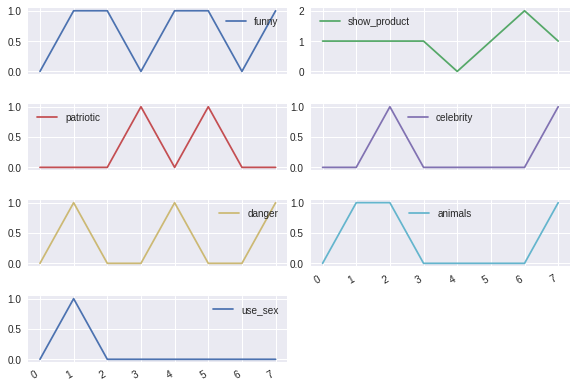

In [19]:
# Plot Toyota over time
TYdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

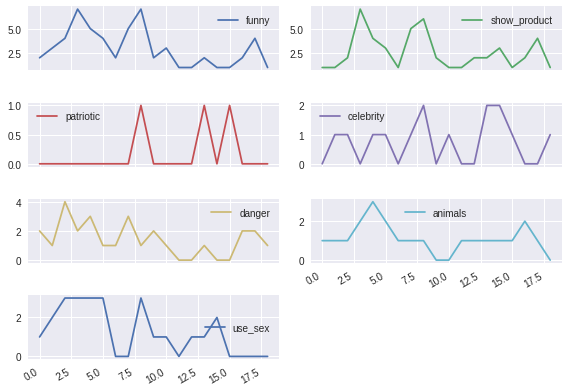

In [20]:
# Plot Bud Light over time
BLdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

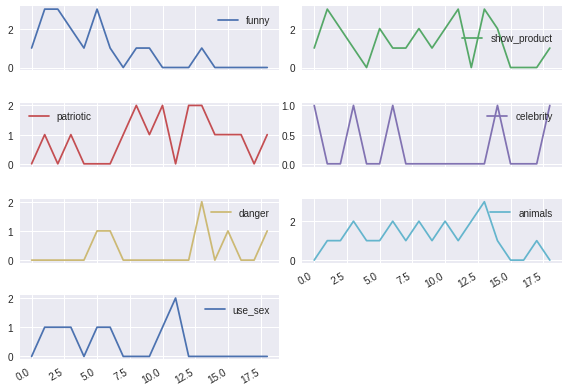

In [21]:
# Plot Budweiser over time
BWdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

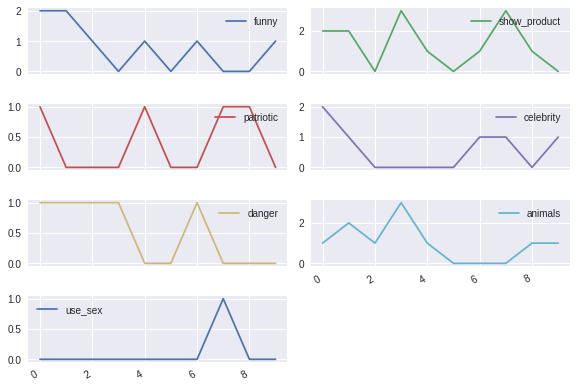

In [22]:
# Plot Coca-Cola over time
CCdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

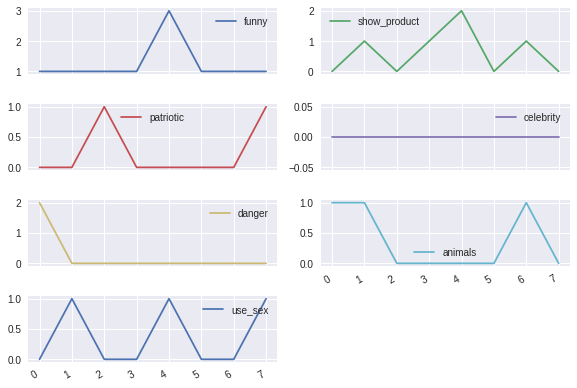

In [23]:
# Plot E-Trade over time
ETdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

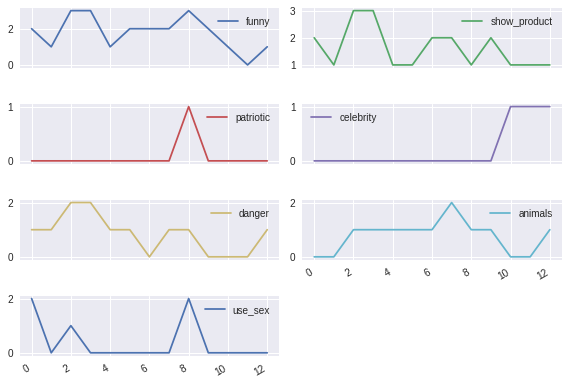

In [24]:
# Plot Doritos over time
Dodf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

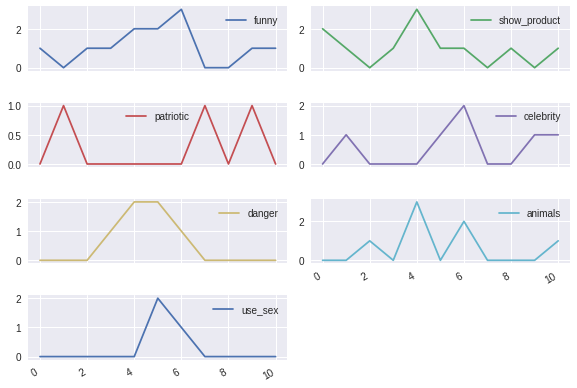

In [25]:
# Plot Hyundai over time
HDdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

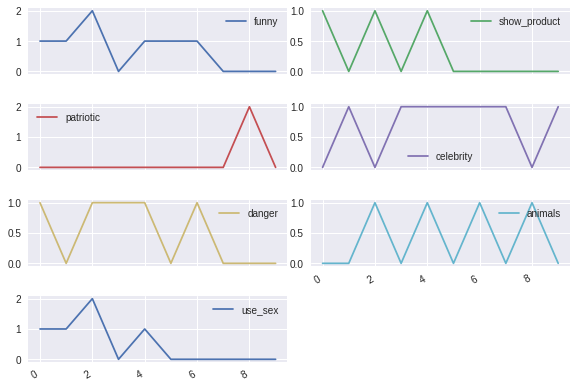

In [26]:
# Plot Kia over time
Kidf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

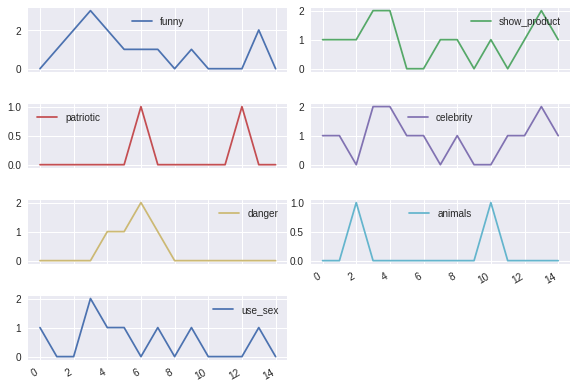

In [27]:
# Plot Pepsi over time
Pedf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()

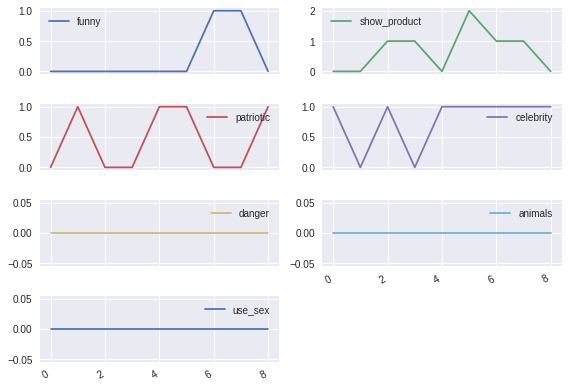

In [28]:
# Plot NFL over time
NFdf.plot(subplots=True, layout=(4,2))
plt.tight_layout()
plt.show()